Based on https://github.com/MachineLearnia/Deep-Learning-Youtube

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

# Fonctions

In [3]:
def initialisation(dimensions):
    
    parametres = {}
    C = len(dimensions)

    np.random.seed(1)

    for c in range(1, C):
        parametres['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parametres['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parametres

In [4]:
def forward_propagation(X, parametres):
  
    activations = {'A0': X}

    C = len(parametres) // 2

    for c in range(1, C + 1):

        Z = parametres['W' + str(c)].dot(activations['A' + str(c - 1)]) + parametres['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

In [5]:
def back_propagation(y, parametres, activations):

    m = y.shape[1]
    C = len(parametres) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    if c > 1:
        dZ = np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])

    return gradients

In [6]:
def update(gradients, parametres, learning_rate):

    C = len(parametres) // 2

    for c in range(1, C + 1):
        parametres['W' + str(c)] = parametres['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres['b' + str(c)] = parametres['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

In [7]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    return Af >= 0.5

In [24]:
def deep_neural_network(X_train, y_train, X_test, y_test, hidden_layers = (16, 16, 16), learning_rate = 0.001, n_iter = 3000):
    
    # initialisation parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    np.random.seed(1)
    parametres = initialisation(dimensions)

    # tableau numpy contenant les futures accuracy et log_loss
    training_history = np.zeros((int(n_iter), 4))

    C = len(parametres) // 2

    # gradient descent
    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(y_train, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
        Af = activations['A' + str(C)]
        
        # calcul du log_loss et de l'accuracy pour train
        training_history[i, 0] = (log_loss(y_train.flatten(), Af.flatten()))
        y_pred = predict(X_train, parametres)
        training_history[i, 2] = (accuracy_score(y_train.flatten(), y_pred.flatten()))
        
        # calcul du log_loss et de l'accuracy pour test
        A_test  = forward_propagation(X_test, parametres)["A"+str(C)]
        training_history[i, 1] = (log_loss(y_test.flatten(), A_test.flatten()))
        y_pred_test = predict(X_test, parametres)
        training_history[i,3] = (accuracy_score(y_test.flatten(), y_pred_test.flatten()))

    # Plot courbe d'apprentissage
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(training_history[:, 0], label='train loss')
    plt.plot(training_history[:, 1], label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(training_history[:, 2], label='train acc')
    plt.plot(training_history[:, 3], label='test acc')
    plt.legend()
    plt.show()

    return training_history

# Dataset

dimensions de X_train: (2, 160)
dimensions de y_train: (1, 160)
dimensions de X_test: (2, 40)
dimensions de y_test: (1, 40)


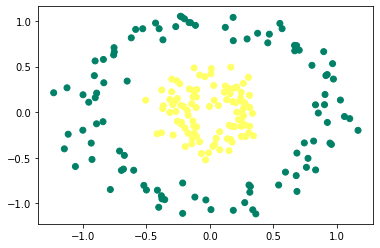

In [25]:
N_sample = 200

X, y = make_circles(n_samples=N_sample, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))
sep = int(0.8*N_sample) # indices de separation des data train/test
X_train = X[:, :sep]
y_train = y[:, :sep]
X_test = X[:, sep:]
y_test = y[:, sep:]

print('dimensions de X_train:', X_train.shape)
print('dimensions de y_train:', y_train.shape)
print('dimensions de X_test:', X_test.shape)
print('dimensions de y_test:', y_test.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|██████████| 10000/10000 [00:16<00:00, 611.41it/s]


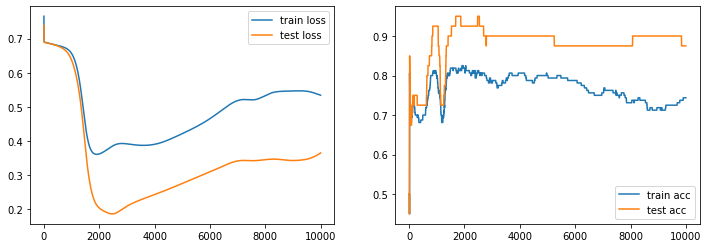

array([[0.76557614, 0.73950578, 0.5       , 0.5       ],
       [0.74043683, 0.72127895, 0.5       , 0.5       ],
       [0.7221908 , 0.70877147, 0.5       , 0.5       ],
       ...,
       [0.53441085, 0.365067  , 0.74375   , 0.875     ],
       [0.5343846 , 0.36512212, 0.74375   , 0.875     ],
       [0.53435838, 0.3651773 , 0.74375   , 0.875     ]])

In [27]:
deep_neural_network(X_train, y_train, X_test, y_test, hidden_layers = (16, 16, 16), learning_rate = 0.1, n_iter = 10_000)